<a href="https://colab.research.google.com/github/Suhas1131/dark-matter-1221/blob/main/Exoplanet_transit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii

In [4]:
# uploading file containing HD189733 transit data
from google.colab import files
uploaded = files.upload()

Saving HD 189733.txt to HD 189733.txt


In [5]:
# http://var2.astro.cz/EN/tresca/transit-detail.php?id=1535045428
dat = astropy.io.ascii.read("HD 189733.txt")

Text(0, 0.5, 'Normalize Flux')

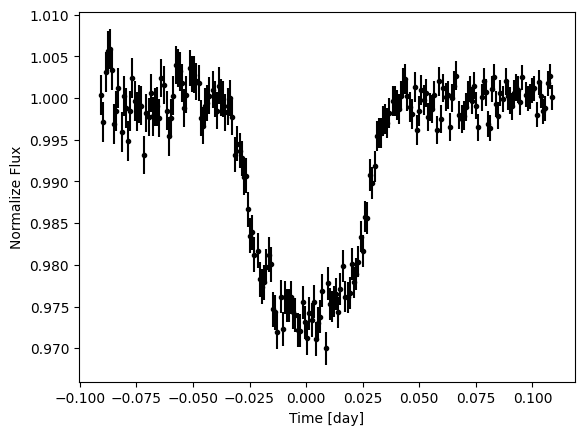

In [21]:
# since the data is asymetrical, we need to add 0.01 to the time
time = dat["col1"] - np.median(dat["col1"]) + 0.01
rel_mag = dat["col2"]
flux = (rel_mag)
err = dat["col3"]
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")

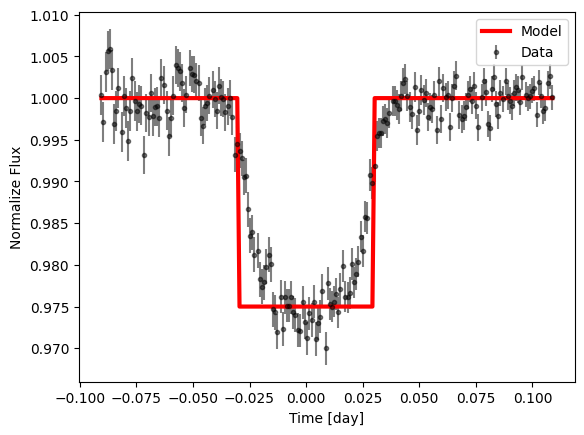

In [37]:
#assigning values to variables
center_time, duration, depth, delta_flux = 0.0, 0.06, 0.025, 0.0
#creating a model for the data
model = box_model(time, center_time, duration, depth, delta_flux)
#creating a plot for the data and data model
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none", alpha=0.5, label="Data")
plt.plot(time, model, color="red", linewidth=3.0, label="Model")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")
plt.legend();

In [38]:
#creating a function to calculate the reduced chi square of the box model
def calc_reduced_chi2(O, C, err, n, m):
  chi2 = np.sum((O - C)**2 / err**2)
  reduced_chi2 = chi2 / (n - m)
  return(reduced_chi2)

In [39]:
# dsplaying reduced chi2
print ("reduced Chi2 = ", calc_reduced_chi2(flux, model, err, len(time), 4.0))

reduced Chi2 =  4.373085786912718


In [40]:
#creating a function to create a trapezoid model
def trapezoid_model(t, center_time, duration, depth, delta_flux, ingress):
  f = np.zeros(np.shape(t))
  ind = np.where(np.abs(t - center_time) < (duration / 2.0))
  f[ind] = 1.0 + delta_flux - depth
  ind = np.where(np.abs(t - center_time) >= (duration / 2.0 + ingress))
  f[ind] = 1.0 + delta_flux
  ind = np.where((np.abs(t - center_time) <= (duration / 2.0 + ingress)) & (np.abs(t - center_time) > (duration / 2.0)))
  for i in ind[0]:
    delta_t = np.abs(np.abs(t[i] - center_time) - (duration / 2.0))
    f[i] = depth / ingress * delta_t + 1.0 + delta_flux - depth
  return(f)

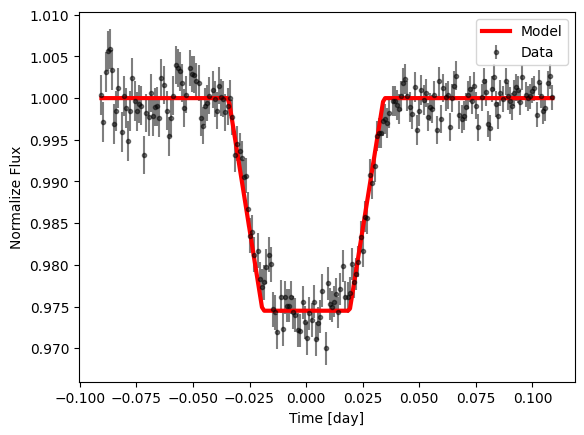

In [75]:
# creating variables for propoerties of the trapezoid model
center_time, duration, depth, delta_flux, ingress = 0.0, 0.0385, 0.0255, 0.0, 0.015
model = trapezoid_model(time, center_time, duration, depth, delta_flux, ingress)
# plotting the transit data and the trapezoid model
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none", alpha=0.5, label="Data")
plt.plot(time, model, color="red", linewidth=3.0, label="Model")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")
plt.legend();

In [78]:
#calculating reduced chi2 for the trapezoid model
red_chi2 = calc_reduced_chi2(flux, model, err, len(time), 4.0)

In [79]:
#displaying reduced chi2 for the trapezoid model
print ("reduced Chi2 = ", red_chi2)

reduced Chi2 =  1.2236146216558104
